<a href="https://colab.research.google.com/github/sigolyori/my-little-projects/blob/main/Prudential_Life_Insurance_Assessment_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

prudential_life_insurance_assessment_path = kagglehub.competition_download('prudential-life-insurance-assessment')
paviiiii_underwriting_best_rf_scikitlearn_default_1_path = kagglehub.model_download('paviiiii/underwriting_best_rf/ScikitLearn/default/1')

print('Data source import complete.')


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.24M/3.24M [00:00<00:00, 121MB/s]

Extracting files...



  0%|          | 0.00/4.09M [00:00<?, ?B/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.09M/4.09M [00:00<00:00, 16.7MB/s]

Data source import complete.


In [4]:
%pip install optuna.integration

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 97.6/97.6 kB 3.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 383.6/383.6 kB 14.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.9/231.9 kB 22.5 MB/s eta 0:00:00


## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [15]:
!ls -al /root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/

total 3336
drwxr-xr-x 2 root root    4096 Apr  4 12:37 .
drwxr-xr-x 3 root root    4096 Apr  4 12:37 ..
-rw-r--r-- 1 root root   25483 Apr  4 12:37 sample_submission.csv.zip
-rw-r--r-- 1 root root  839141 Apr  4 12:37 test.csv.zip
-rw-r--r-- 1 root root 2538336 Apr  4 12:37 train.csv.zip


In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
import zipfile
import os

# ÏïïÏ∂ï ÌååÏùºÎì§Ïùò Ïù¥Î¶ÑÏùÑ Î¶¨Ïä§Ìä∏Î°ú ÎßåÎì≠ÎãàÎã§.
zip_files = ['/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/sample_submission.csv.zip',
             '/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/test.csv.zip',
             '/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/train.csv.zip']

extract_path = '/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/'

# Í∞Å zip ÌååÏùºÏùÑ ÏàúÌöåÌïòÎ©∞ ÏïïÏ∂ïÏùÑ ÌíâÎãàÎã§.
for zip_file in zip_files:
    # ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
    if os.path.exists(zip_file):
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
            print(f"'{zip_file}' ÏïïÏ∂ï Ìï¥Ï†ú ÏôÑÎ£å.")
    else:
        print(f"'{zip_file}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

'/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/sample_submission.csv.zip' ÏïïÏ∂ï Ìï¥Ï†ú ÏôÑÎ£å.
'/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/test.csv.zip' ÏïïÏ∂ï Ìï¥Ï†ú ÏôÑÎ£å.
'/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/train.csv.zip' ÏïïÏ∂ï Ìï¥Ï†ú ÏôÑÎ£å.


In [17]:
import pandas as pd
import os

# ÏïïÏ∂ï Ìï¥Ï†úÎêú CSV ÌååÏùºÎì§Ïùò Í≤ΩÎ°ú ÏÑ§Ï†ï
extract_path = '/root/.cache/kagglehub/competitions/prudential-life-insurance-assessment/'

train_csv = os.path.join(extract_path, 'train.csv')
test_csv = os.path.join(extract_path, 'test.csv')
sample_submission_csv = os.path.join(extract_path, 'sample_submission.csv')

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)
sample_submission_df = pd.read_csv(sample_submission_csv)

# Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ ÌôïÏù∏
print("Train DataFrame Shape:", train_df.shape)
print("Test DataFrame Shape:", test_df.shape)
print("Sample Submission DataFrame Shape:", sample_submission_df.shape)

# Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ÌôïÏù∏
print("\nTrain DataFrame Head:")
print(train_df.head())

print("\nTest DataFrame Head:")
print(test_df.head())

print("\nSample Submission DataFrame Head:")
print(sample_submission_df.head())

Train DataFrame Shape: (59381, 128)
Test DataFrame Shape: (19765, 127)
Sample Submission DataFrame Shape: (19765, 2)

Train DataFrame Head:
   Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3    

In [18]:
train_df['InsuredInfo_1'].value_counts()

InsuredInfo_1
1    47223
2    11886
3      272
Name: count, dtype: int64

<ipython-input-19-dae0a6235659>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")


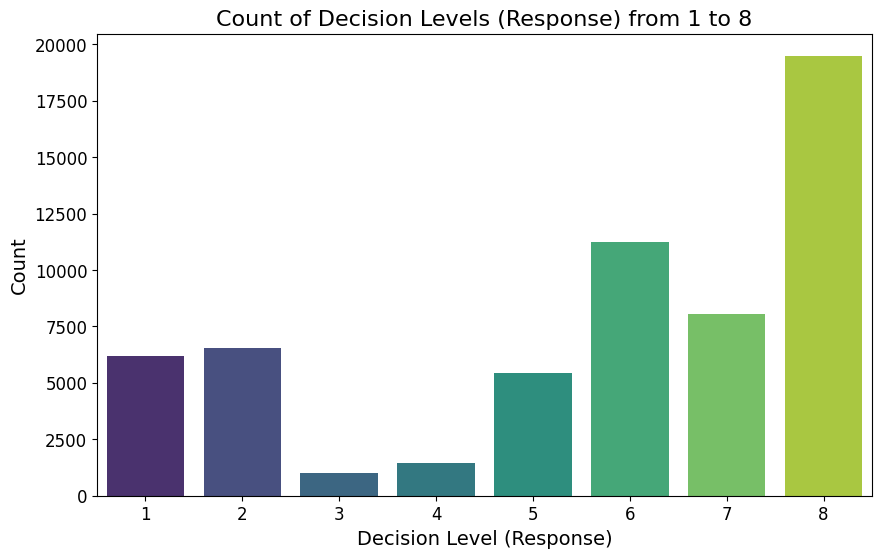

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Response Ïó¥Ïùò Ïπ¥Ïö¥Ìä∏ Í∞í Í≥ÑÏÇ∞
response_counts = train_df['Response'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")
plt.title("Count of Decision Levels (Response) from 1 to 8", fontsize=16)
plt.xlabel("Decision Level (Response)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [20]:
# Response Î≥ÄÌôò Ï†ÅÏö©
train_df['Response'] = train_df['Response'].apply(lambda x: 1 if x == 1 else 0)

In [21]:
train_df['Response'].value_counts()

Response
0    53174
1     6207
Name: count, dtype: int64

In [22]:
6207/(6207+53174)

0.10452838450009262

<ipython-input-23-448896b76e0c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")


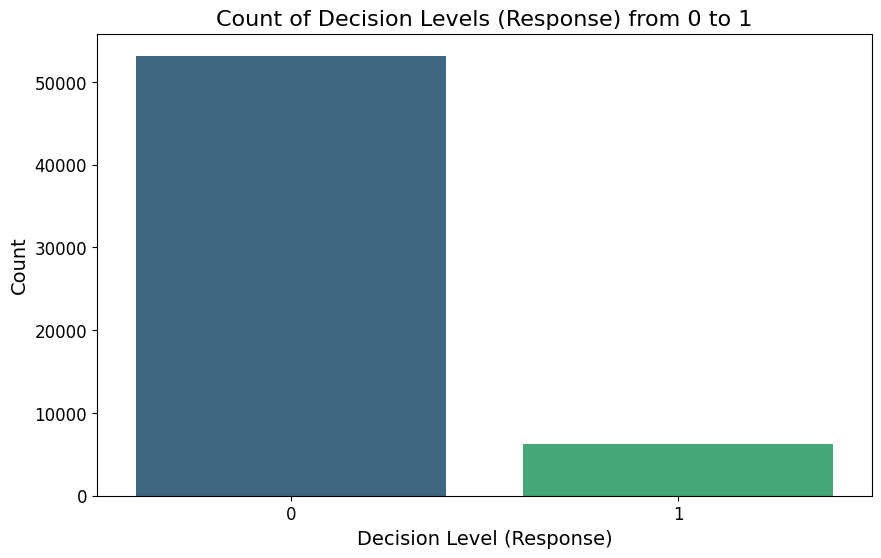

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Response Ïó¥Ïùò Ïπ¥Ïö¥Ìä∏ Í∞í Í≥ÑÏÇ∞
response_counts = train_df['Response'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(x=response_counts.index, y=response_counts.values, palette="viridis")
plt.title("Count of Decision Levels (Response) from 0 to 1", fontsize=16)
plt.xlabel("Decision Level (Response)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÍ≤Ω

Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏóê ÎåÄÌïú Í≤∞Ï†ï ÏàòÌñâÏù¥ Ïö∞ÏÑ† ÏöîÍµ¨Îê®. Í≥†Ïú† Í∞íÏù¥ 40Í∞ú Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ Î≤îÏ£ºÌòïÏúºÎ°ú Íµ¨Î∂ÑÌï®. 40Í∞ú Ïù¥ÏÉÅÏùò Í∞íÏùÑ Í∞ÄÏßÑ Í≤ΩÏö∞ Í∞úÎ≥Ñ Î≥ÄÏàòÏóê ÎåÄÌï¥ÏÑú Í∞í, Î∂ÑÌè¨Î•º Î≥¥Í≥† ÌåêÎã®Ìï®.

In [24]:
# Î™ÖÎ™©Ìòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏ (categorical)
categorical_vars = [
    'Product_Info_1', 'Product_Info_2', 'Product_Info_3', 'Product_Info_5',
    'Product_Info_6', 'Product_Info_7', 'Employment_Info_2', 'Employment_Info_3',
    'Employment_Info_5', 'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3',
    'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7',
    'Insurance_History_1', 'Insurance_History_2', 'Insurance_History_3',
    'Insurance_History_4', 'Insurance_History_7', 'Insurance_History_8',
    'Insurance_History_9', 'Family_Hist_1', 'Medical_History_2',
    'Medical_History_3', 'Medical_History_4', 'Medical_History_5',
    'Medical_History_6', 'Medical_History_7', 'Medical_History_8',
    'Medical_History_9', 'Medical_History_11', 'Medical_History_12',
    'Medical_History_13', 'Medical_History_14', 'Medical_History_16',
    'Medical_History_17', 'Medical_History_18', 'Medical_History_19',
    'Medical_History_20', 'Medical_History_21', 'Medical_History_22',
    'Medical_History_23', 'Medical_History_25', 'Medical_History_26',
    'Medical_History_27', 'Medical_History_28', 'Medical_History_29',
    'Medical_History_30', 'Medical_History_31', 'Medical_History_33',
    'Medical_History_34', 'Medical_History_35', 'Medical_History_36',
    'Medical_History_37', 'Medical_History_38', 'Medical_History_39',
    'Medical_History_40', 'Medical_History_41'
]

# Ïó∞ÏÜçÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏ (continuous)
continuous_vars = [
    'Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
    'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
    'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5'
]

# Ïù¥ÏÇ∞Ìòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏ (discrete)
discrete_vars = [
    'Medical_History_1', 'Medical_History_10', 'Medical_History_15',
    'Medical_History_24', 'Medical_History_32'
]

# ÎçîÎØ∏ Î≥ÄÏàò Î¶¨Ïä§Ìä∏ (dummy variables)
dummy_vars = [f'Medical_Keyword_{i}' for i in range(1, 49)]


In [25]:
import pandas as pd

def convert_data_types(df, categorical_vars, continuous_vars, discrete_vars, dummy_vars):
    """
    Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïó¥ ÌÉÄÏûÖÏùÑ ÏßÄÏ†ïÎêú Î≥ÄÏàò Í∑∏Î£πÏóê Îî∞Îùº Î≥ÄÌôòÌï©ÎãàÎã§.

    Parameters:
    - df (pd.DataFrame): Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ Î≥ÄÌôòÌï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    - categorical_vars (list): Î™ÖÎ™©Ìòï Î≥ÄÏàò Î™©Î°ù
    - continuous_vars (list): Ïó∞ÏÜçÌòï Î≥ÄÏàò Î™©Î°ù
    - discrete_vars (list): Ïù¥ÏÇ∞Ìòï Î≥ÄÏàò Î™©Î°ù
    - dummy_vars (list): ÎçîÎØ∏ Î≥ÄÏàò Î™©Î°ù (0/1)

    Returns:
    - pd.DataFrame: ÌÉÄÏûÖ Î≥ÄÌôòÏù¥ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    """
    # Î™ÖÎ™©Ìòï Î≥ÄÏàò Î≥ÄÌôò
    if categorical_vars:
        df[categorical_vars] = df[categorical_vars].astype('category')

    # Ïó∞ÏÜçÌòï Î≥ÄÏàò Î≥ÄÌôò
    if continuous_vars:
        df[continuous_vars] = df[continuous_vars].astype('float')

    # Ïù¥ÏÇ∞Ìòï Î≥ÄÏàò Î≥ÄÌôò
    if discrete_vars:
        df[discrete_vars] = df[discrete_vars].replace([float('inf'), float('-inf')], float('nan'))  # Î¨¥ÌïúÍ∞í Ï≤òÎ¶¨
        df[discrete_vars] = df[discrete_vars].fillna(0).astype('float')  # NaN Ï≤òÎ¶¨ ÌõÑ float Î≥ÄÌôò

    # ÎçîÎØ∏ Î≥ÄÏàò Î≥ÄÌôò
    if dummy_vars:
        df[dummy_vars] = df[dummy_vars].astype('int32')

    # Î≥ÄÌôò Í≤∞Í≥º Î∞òÌôò
    return df

In [26]:
train_df = convert_data_types(train_df, categorical_vars, continuous_vars, discrete_vars, dummy_vars)

In [27]:
train_df = train_df.drop('Id', axis=1)

## Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò

`Medical_History`, `Employment_Info`, `Insurance_History` ÏôÄ Í¥ÄÎ†®Ìïú Î≥ÄÏàòÎì§ÏùÄ Yeo-Johnson Î≥ÄÌôòÏùÑ ÏàòÌñâÌï®.

Missing data Ï≤òÎ¶¨Îäî ÏïÑÎûò ÏÇ¨Ìï≠Ïóê ÎåÄÌïú ÌåêÎã®Î∂ÄÌÑ∞ ÏàòÌñâÌï®.

    MCAR (Missing Completely At Random) - ÏôÑÏ†ÑÌûà Î¨¥ÏûëÏúÑÎ°ú Í≤∞Ï∏°
    MAR (Missing At Random) - Î¨¥ÏûëÏúÑ ÏïÑÎãò
    MNAR (Missing Not At Random) - Î¨¥ÏûëÏúÑÍ∞Ä ÏïÑÎãò
    
MCARÏùò Ïó¨Î∂ÄÎäî Little's MCAR ÌÖåÏä§Ìä∏Î•º ÏàòÌñâÌïòÏó¨ Ïïå Ïàò ÏûàÏùå. MAR, MNARÏùò Íµ¨Î∂ÑÏùÄ ÎèÑÎ©îÏù∏ ÏßÄÏãùÏùÑ Í∏∞Î∞òÌïòÏó¨ Íµ¨Î∂ÑÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏûÑ.

Îç∞Ïù¥ÌÑ∞Îäî ÌÅ¨Í≤å ÏïÑÎûòÏôÄ Í∞ôÏù¥ Íµ¨Î∂ÑÎê®. ÎåÄÎ∂ÑÎ•ò ÎÇ¥Ïùò Î≥ÄÏàò Í∞ÑÏóêÏÑúÎßå Missing Ïó¨Î∂ÄÏóê ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî Í≤ÉÏù∏ÏßÄ ÌååÏïÖ ÌïÑÏöîÌï®.

| **Variable** | **Description** |
| --- | --- |
| Id | A unique identifier associated with an application. |
| Product_Info_1-7 | A set of normalized variables relating to the product applied for |
| Ins_Age | Normalized age of applicant |
| Ht | Normalized height of applicant |
| Wt | Normalized weight of applicant |
| BMI | Normalized BMI of applicant |
| Employment_Info_1-6 | A set of normalized variables relating to the employment history of the applicant. |
| InsuredInfo_1-6 | A set of normalized variables providing information about the applicant. |
| Insurance_History_1-9 | A set of normalized variables relating to the insurance history of the applicant. |
| Family_Hist_1-5 | A set of normalized variables relating to the family history of the applicant. |
| Medical_History_1-41 | A set of normalized variables relating to the medical history of the applicant. |
| Medical_Keyword_1-48 | A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application. |
| Response | This is the target variable, an ordinal¬†variable relating to the final decision associated with an application |

In [28]:
import pandas as pd

def missing_values_table(df, dropna=True, sort=True, ascending=False, top=None):
    """
    Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Í∞Å Ïó¥Ïóê ÎåÄÌïú Í≤∞Ï∏°Í∞í ÏàòÏôÄ ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ Î∞òÌôòÌï©ÎãàÎã§.

    Parameters:
    -----------
    df : pandas.DataFrame
        Î∂ÑÏÑùÌï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ.

    dropna : bool, default=True
        TrueÏù∏ Í≤ΩÏö∞, Í≤∞Ï∏°Í∞íÏù¥ ÏóÜÎäî Ïó¥ÏùÑ Ï†úÏô∏Ìï©ÎãàÎã§.

    sort : bool, default=True
        TrueÏù∏ Í≤ΩÏö∞, Í≤∞Ï∏°Í∞í ÎπÑÏú®Ïóê Îî∞Îùº ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìï©ÎãàÎã§.

    ascending : bool, default=False
        sortÍ∞Ä TrueÏùº Îïå, Ï†ïÎ†¨ ÏàúÏÑúÎ•º Í≤∞Ï†ïÌï©ÎãàÎã§. FalseÎäî ÎÇ¥Î¶ºÏ∞®Ïàú, TrueÎäî Ïò§Î¶ÑÏ∞®Ïàú.

    top : int, default=None
        ÏÉÅÏúÑ NÍ∞úÏùò Í≤∞Í≥ºÎßå ÌëúÏãúÌï©ÎãàÎã§. NoneÏù∏ Í≤ΩÏö∞, Î™®Îì† Í≤∞Í≥ºÎ•º ÌëúÏãúÌï©ÎãàÎã§.

    Returns:
    --------
    missing_data : pandas.DataFrame
        Í∞Å Ïó¥Ïùò Í≤∞Ï∏°Í∞í ÏàòÏôÄ ÎπÑÏú®ÏùÑ Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ.

    Examples:
    ---------
    >>> missing_values_table(df)
    >>> missing_values_table(df, dropna=False, sort=False)
    >>> missing_values_table(df, top=10)
    """
    # Ï†ÑÏ≤¥ Ìñâ Ïàò Í≥ÑÏÇ∞
    total = df.shape[0]

    # Í∞Å Ïó¥Ïùò Í≤∞Ï∏°Í∞í Ïàò Í≥ÑÏÇ∞
    missing_counts = df.isnull().sum()

    # Í∞Å Ïó¥Ïùò Í≤∞Ï∏°Í∞í ÎπÑÏú® Í≥ÑÏÇ∞
    missing_percent = (missing_counts / total) * 100

    # Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÌÜµÌï©
    missing_data = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage (%)': missing_percent
    })

    # Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Ïó¥Îßå ÌïÑÌÑ∞ÎßÅ (dropna=TrueÏù∏ Í≤ΩÏö∞)
    if dropna:
        missing_data = missing_data[missing_data['Missing Count'] > 0]

    # Ï†ïÎ†¨ (sort=TrueÏù∏ Í≤ΩÏö∞)
    if sort:
        missing_data = missing_data.sort_values(by='Missing Percentage (%)', ascending=ascending)

    # ÏÉÅÏúÑ NÍ∞úÎßå ÌëúÏãú (top ÏßÄÏ†ïÌïú Í≤ΩÏö∞)
    if top is not None:
        missing_data = missing_data.head(top)

    return missing_data


In [29]:
missing_data = missing_values_table(train_df)

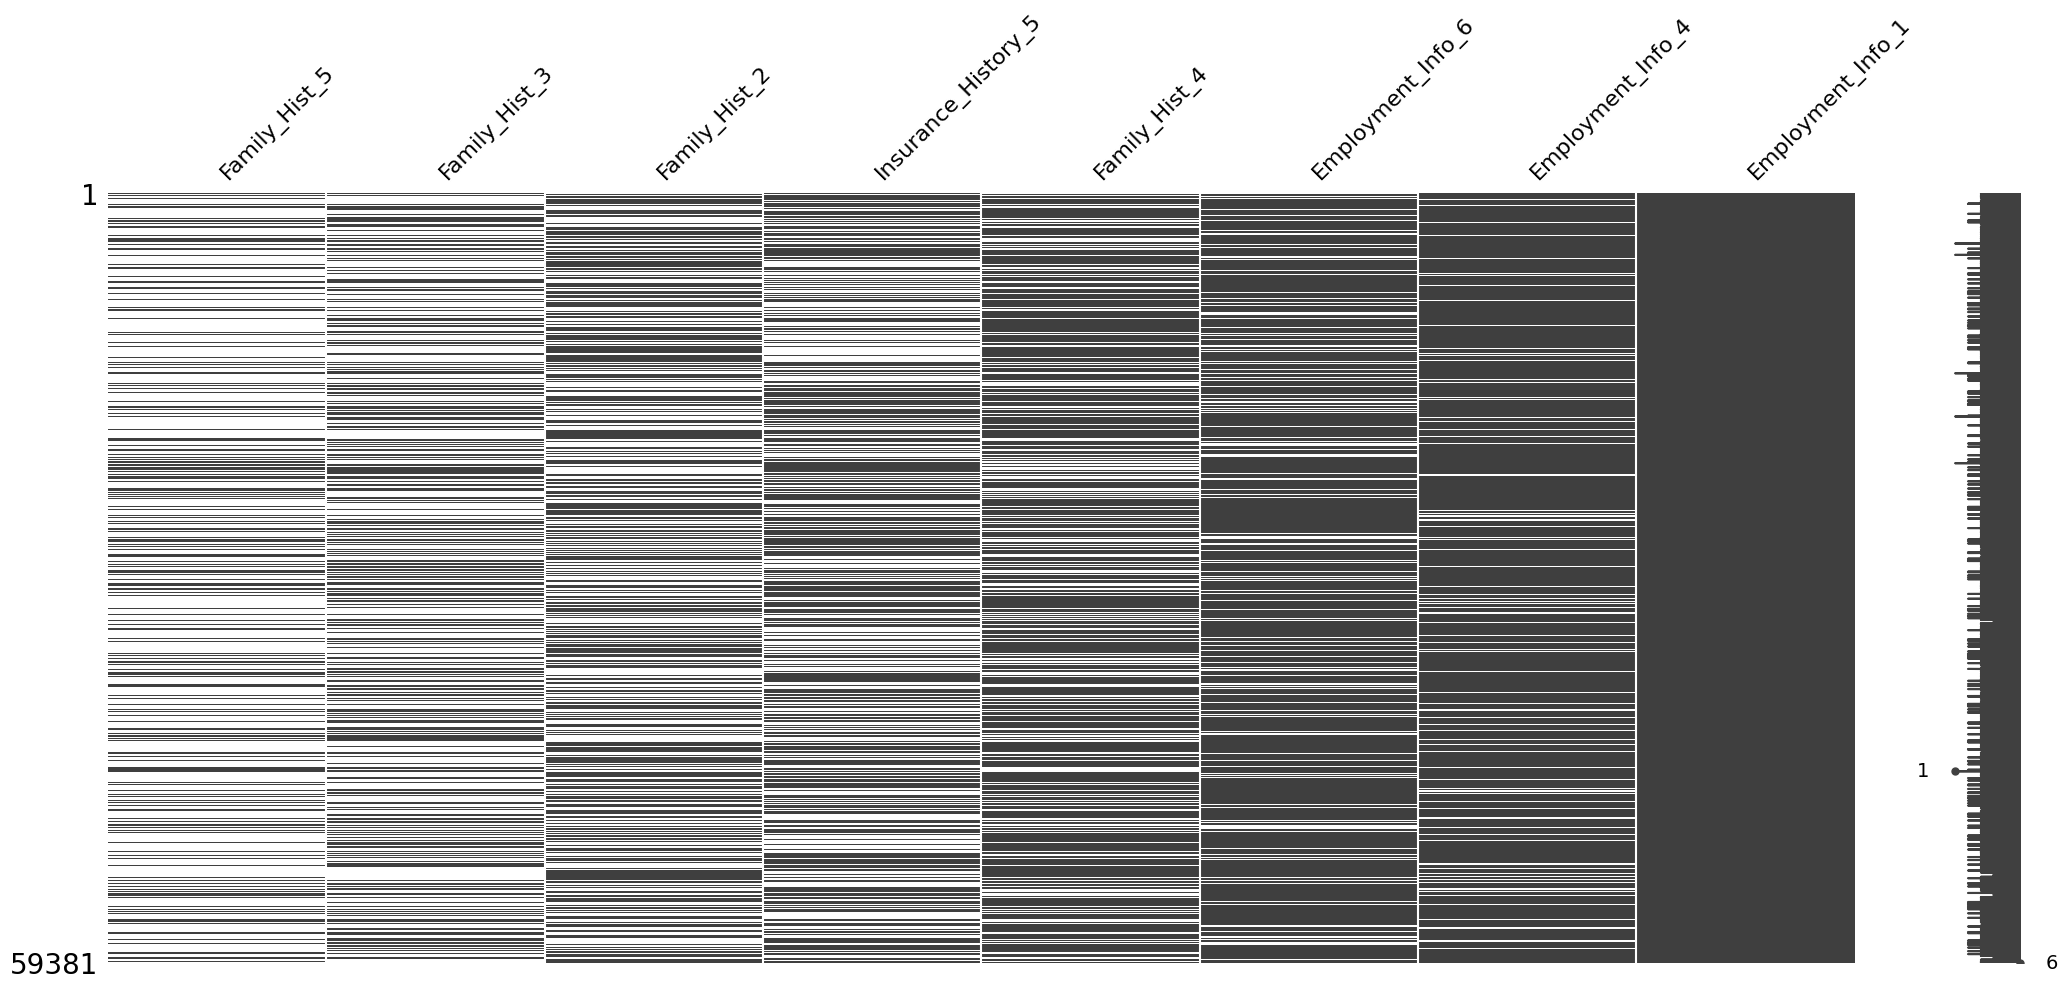

In [30]:
import missingno as msno
import matplotlib.pyplot as plt

missing_cols = missing_data.index.values

# Í≤∞Ï∏°Ïπò ÌûàÌä∏Îßµ
msno.matrix(train_df[missing_cols])
plt.show()


Family_Hist Î≥ÄÏàò Í∞Ñ Missing ÏóêÎäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî Í≤ÉÏ≤òÎüº Î≥¥ÏûÑ.

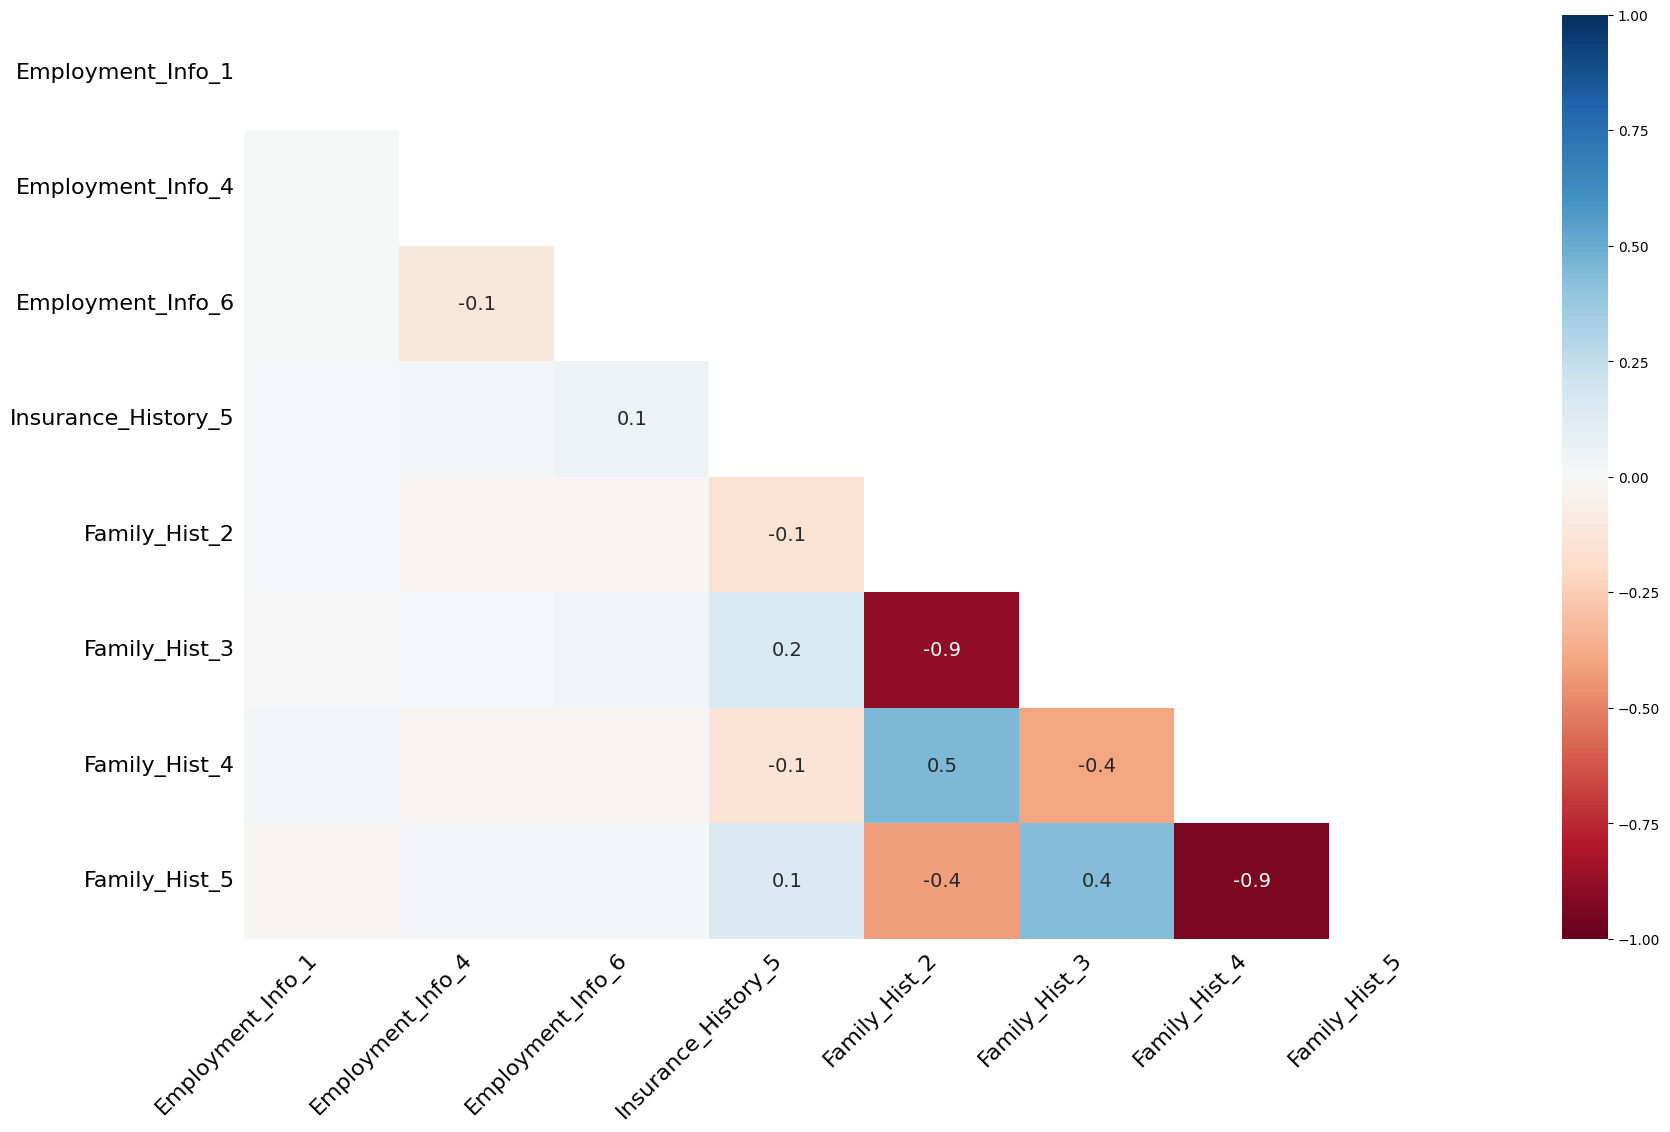

In [31]:
# Í≤∞Ï∏°Ïπò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
msno.heatmap(train_df)
plt.show()

    Employment_Info_1: Ï§ëÍ∞ÑÍ∞í ÎåÄÏ≤¥
    Family_Hist_1~5, Insurance_History_5, Employment_Info_4, Employment_Info_6, Medical_History_1 : MICE ÎåÄÏ≤¥


In [32]:
# Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞
X_train_full = train_df.drop(['Response'], axis=1)
y_train = train_df['Response']

In [33]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import PowerTransformer
import sklearn

# 1. Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥Î•º ÏúÑÌïú Ïó¥ Í∑∏Î£πÌôî
knn_impute_cols = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6']
mice_impute_cols = [
    'Family_Hist_1', 'Family_Hist_2', 'Family_Hist_3',
    'Family_Hist_4', 'Family_Hist_5', 'Insurance_History_5'
]

# 2. Imputer Ï†ïÏùò
knn_imputer = KNNImputer(n_neighbors=2)
mice_imputer = IterativeImputer(random_state=0)
# Yeo-Johnson Î≥ÄÌôòÍ∏∞
# yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# 3. ColumnTransformer ÏÑ§Ï†ï
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_impute', knn_imputer, knn_impute_cols),
        ('mice_impute', mice_imputer, mice_impute_cols),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False  # scikit-learn 1.2+ÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•
)

# 4. Ï†ÑÏ≤¥ Pipeline ÏÑ§Ï†ï
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# 5. ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
X_train_imputed = pipeline.fit_transform(X_train_full)

# 6. Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
if sklearn.__version__ >= '1.2':
    feature_names = preprocessor.get_feature_names_out()
else:
    try:
        feature_names = preprocessor.get_feature_names()
    except AttributeError:
        feature_names = X_train_full.columns  # ÏûÑÏãúÎ°ú ÏõêÎ≥∏ Ïó¥ Ïù¥Î¶Ñ ÏÇ¨Ïö©

# 7. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
X_train_imputed = pd.DataFrame(X_train_imputed, columns=feature_names)
# ÏõêÎ≥∏ Ïó¥ ÏàúÏÑúÎåÄÎ°ú Ïû¨Ï†ïÎ†¨
X_train_imputed = X_train_imputed[X_train_full.columns]

In [34]:
X_train_imputed = convert_data_types(X_train_imputed, categorical_vars, continuous_vars, discrete_vars, dummy_vars)

<ipython-input-25-15558396798a>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[discrete_vars] = df[discrete_vars].replace([float('inf'), float('-inf')], float('nan'))  # Î¨¥ÌïúÍ∞í Ï≤òÎ¶¨


In [39]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Set sparse_output to False

# Fit the encoder on the train data and transform
encoded_train = encoder.fit_transform(X_train_imputed[categorical_vars])

# Convert encoded arrays back to DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_vars))

# Add back non-categorical columns to the final DataFrame
X_train_encoded = pd.concat([X_train_imputed.reset_index(drop=True), encoded_train_df], axis=1).drop(columns=categorical_vars)

In [40]:
# Results
print("Encoded Train DataFrame:")
print(X_train_encoded.shape)


Encoded Train DataFrame:
(59381, 895)


## Î™®Îç∏ÎßÅ

In [41]:
from sklearn.model_selection import train_test_split
# 1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ Í≤ÄÏ¶ù ÏÑ∏Ìä∏)
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_encoded, y_train, test_size=0.2, random_state=42, stratify=y_train
)
print("\nÌïôÏäµ ÏÑ∏Ìä∏ ÌäπÏßï Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú:", X_train.shape)
print("Í≤ÄÏ¶ù ÏÑ∏Ìä∏ ÌäπÏßï Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú:", X_val.shape)


ÌïôÏäµ ÏÑ∏Ìä∏ ÌäπÏßï Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú: (47504, 895)
Í≤ÄÏ¶ù ÏÑ∏Ìä∏ ÌäπÏßï Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú: (11877, 895)


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

def evaluate_model(model, X_test, y_test):
    """
    Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÍ≥† Í≤∞Í≥ºÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.

    Parameters:
    -----------
    model : sklearn Î™®Îç∏
        ÌïôÏäµÎêú Î®∏Ïã†Îü¨Îãù Î™®Îç∏.
    X_test : pandas.DataFrame or numpy.ndarray
        ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïùò ÌäπÏßï Îç∞Ïù¥ÌÑ∞.
    y_test : pandas.Series or numpy.ndarray
        ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïùò Ïã§Ï†ú Î†àÏù¥Î∏î.
    """
    # ÏòàÏ∏° ÏàòÌñâ
    y_pred = model.predict(X_test)

    # Cohen's Kappa Í≥ÑÏÇ∞
    kappa = cohen_kappa_score(y_test, y_pred)

    # ÌèâÍ∞Ä Í≤∞Í≥º Ï∂úÎ†•
    print(f"\nCohen's Kappa (ùúÖ): {kappa:.4f}")
    print("\nÌòºÎèô ÌñâÎ†¨ (Confusion Matrix):")
    print(confusion_matrix(y_test, y_pred))
    print("\nÎ∂ÑÎ•ò Î≥¥Í≥†ÏÑú (Classification Report):")
    print(classification_report(y_test, y_pred))


In [43]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [44]:
def objective(trial):
    # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞Ñ Ï†ïÏùò
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 110)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

    # Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†ÌòïÏùÑ ÏûêÎèôÏúºÎ°ú Ï≤òÎ¶¨
    )

    # Î™®Îç∏ ÌïôÏäµ
    rf.fit(X_train, y_train_split)

    # ÏòàÏ∏°
    y_pred = rf.predict(X_val)

    # ÌèâÍ∞Ä ÏßÄÌëú ÏÑ†ÌÉù (Ïòà: F1-score)
    score = cross_val_score(rf, X_train, y_train_split, cv=3, scoring='f1').mean()

    return score

# Ïä§ÌÑ∞Îîî ÏÉùÏÑ± (TPEÍ∞Ä Í∏∞Î≥∏)
study = optuna.create_study(direction='maximize',  pruner=optuna.pruners.MedianPruner())

# ÏµúÏ†ÅÌôî ÏàòÌñâ
study.optimize(objective, n_trials=10, timeout=600)

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", study.best_params)
print("ÏµúÍ≥† Ï†ïÌôïÎèÑ:", study.best_value)

[I 2025-04-04 12:47:48,488] A new study created in memory with name: no-name-86170794-bace-40fb-adce-b6ea352001eb
[I 2025-04-04 12:53:19,519] Trial 0 finished with value: 0.3498908290045144 and parameters: {'n_estimators': 892, 'max_depth': 49, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.3498908290045144.
[I 2025-04-04 12:56:29,578] Trial 1 finished with value: 0.30968238583747193 and parameters: {'n_estimators': 517, 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.3498908290045144.
[I 2025-04-04 12:59:43,360] Trial 2 finished with value: 0.3109188674841712 and parameters: {'n_estimators': 534, 'max_depth': 108, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.3498908290045144.


ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: {'n_estimators': 892, 'max_depth': 49, 'min_samples_split': 7, 'min_samples_leaf': 4}
ÏµúÍ≥† Ï†ïÌôïÎèÑ: 0.3498908290045144


In [45]:
# ÏµúÏ†ÅÏùò Î™®Îç∏Î°ú ÌèâÍ∞Ä ÏàòÌñâ
best_rf = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

best_rf.fit(X_train, y_train_split)

evaluate_model(best_rf, X_val, y_val)


Cohen's Kappa (ùúÖ): 0.3220

ÌòºÎèô ÌñâÎ†¨ (Confusion Matrix):
[[10000   636]
 [  789   452]]

Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú (Classification Report):
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10636
           1       0.42      0.36      0.39      1241

    accuracy                           0.88     11877
   macro avg       0.67      0.65      0.66     11877
weighted avg       0.87      0.88      0.88     11877



In [ ]:
from sklearn.linear_model import LogisticRegression

def objective(trial):
    # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞Ñ Ï†ïÏùò
    C = trial.suggest_float('C', 1e-4, 1e4, log=True)

    # Logistic Regression Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    try:
        model = LogisticRegression(
            C=C,
            penalty='l1',
            solver='saga',
            class_weight='balanced',
            max_iter=1000,
            random_state=42,
            n_jobs=-1
        )
    except ValueError:
        # ÏùºÎ∂Ä solverÏôÄ penalty Ï°∞Ìï©ÏùÄ Ïú†Ìö®ÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏùå
        return -np.inf  # ÏµúÏ†ÅÌôî Í≥ºÏ†ïÏóêÏÑú Ï†úÏô∏

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train_split)

    # ÏòàÏ∏°
    y_pred = model.predict(X_val)

    # ÌèâÍ∞Ä ÏßÄÌëú ÏÑ†ÌÉù (Ïòà: F1-score)
    score = cross_val_score(model, X_train, y_train_split, cv=3, scoring='f1').mean()

    return score

# Ïä§ÌÑ∞Îîî ÏÉùÏÑ± (ÏµúÎåÄÌôîÎ•º Î™©ÌëúÎ°ú Ìï®)
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())

# ÏµúÏ†ÅÌôî ÏàòÌñâ
study.optimize(objective, n_trials=10, timeout=600)  # n_trialsÏôÄ timeoutÏùÄ ÌïÑÏöîÏóê Îî∞Îùº Ï°∞Ï†ï

[I 2025-04-04 13:01:32,384] A new study created in memory with name: no-name-f87887bb-d6db-455a-b7c3-9816f5d2f219
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ Ïû¨ÌïôÏäµ
best_params = study.best_params
best_lr = LogisticRegression(
    C=best_params['C'],
    random_state=42,
    n_jobs=-1,
    class_weight='balanced',
    solver='saga',
    penalty='l1'
)

# Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Ïû¨ÌïôÏäµ (ÌïÑÏöîÏóê Îî∞Îùº)
best_lr.fit(X_train, y_train_split)

# Î™®Îç∏ ÌèâÍ∞Ä
print("\nÎ°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌèâÍ∞Ä:")
evaluate_model(best_lr, X_val, y_val)

In [ ]:
from sklearn.svm import LinearSVC

def objective(trial):
    # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞Ñ Ï†ïÏùò
    C = trial.suggest_float('C', 1e-4, 1e4, log=True)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    loss = trial.suggest_categorical('loss', ['hinge', 'squared_hinge'])

    # LinearSVC Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    try:
        model = LinearSVC(
            C=C,
            loss=loss,
            class_weight='balanced',
            max_iter=max_iter,
            random_state=42
        )
    except ValueError:
        # ÏùºÎ∂Ä ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÄ Ïú†Ìö®ÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏùå
        return -np.inf  # OptunaÍ∞Ä Ïù¥ ÏãúÎèÑÎ•º Î¨¥ÏãúÌïòÍ≤å Ìï®

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train_split)

    # ÏòàÏ∏°
    y_pred = model.predict(X_val)

    # ÌèâÍ∞Ä ÏßÄÌëú ÏÑ†ÌÉù (Ïòà: F1-score)
    score = cross_val_score(model, X_train, y_train_split, cv=3, scoring='f1').mean()

    return score

# Ïä§ÌÑ∞Îîî ÏÉùÏÑ± (ÏµúÎåÄÌôîÎ•º Î™©ÌëúÎ°ú Ìï®)
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())

# ÏµúÏ†ÅÌôî ÏàòÌñâ
study.optimize(objective, n_trials=10, timeout=600)  # n_trialsÏôÄ timeoutÏùÄ ÌïÑÏöîÏóê Îî∞Îùº Ï°∞Ï†ï

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", study.best_params)
print("ÏµúÍ≥† Cohen's Kappa:", study.best_value)

In [ ]:
# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ Ïû¨ÌïôÏäµ
best_params = study.best_params
loss = best_params['loss']
C = best_params['C']
max_iter = best_params['max_iter']

best_svm = LinearSVC(
    C=C,
    loss=loss,
    class_weight='balanced',
    max_iter=max_iter,
    random_state=42
)

# Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Ïû¨ÌïôÏäµ (ÌïÑÏöîÏóê Îî∞Îùº)
best_svm.fit(X_train, y_train_split)

# Î™®Îç∏ ÌèâÍ∞Ä
print("\nÏµúÏ†ÅÌôîÎêú LinearSVC Î™®Îç∏ ÌèâÍ∞Ä:")
evaluate_model(best_svm, X_val, y_val)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from optuna.integration import LightGBMPruningCallback

def objective(trial):
    # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞Ñ Ï†ïÏùò
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 10.0),
        'class_weight':'balanced',
        'random_state': 42,
        'n_jobs': -1
    }

    # LGBMClassifier Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    model = LGBMClassifier(**param)

    model.fit(X_train, y_train_split)

    # ÏòàÏ∏°
    y_pred = model.predict(X_val)

    # ÌèâÍ∞Ä ÏßÄÌëú ÏÑ†ÌÉù (Ïòà: F1-score)
    score = cross_val_score(model, X_train, y_train_split, cv=3, scoring='f1').mean()

    return score


# Ïä§ÌÑ∞Îîî ÏÉùÏÑ± (ÏµúÎåÄÌôîÎ•º Î™©ÌëúÎ°ú Ìï®)
study = optuna.create_study(direction='maximize', pruner=optuna.pruners.MedianPruner())

# ÏµúÏ†ÅÌôî ÏàòÌñâ
study.optimize(objective, n_trials=100, timeout=600, gc_after_trial=True)

# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:", study.best_params)
print("ÏµúÍ≥† Cohen's Kappa:", study.best_value)

In [ ]:
# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ Ïû¨ÌïôÏäµ
best_params = study.best_params
best_params['class_weight'] = 'balanced'
best_params['random_state'] = 42
best_params['n_jobs'] = -1

best_lgbm = LGBMClassifier(**best_params)

# Ï†ÑÏ≤¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Ïû¨ÌïôÏäµ
best_lgbm.fit(X_train, y_train_split)

In [ ]:
# Î™®Îç∏ ÌèâÍ∞Ä
print("\nÏµúÏ†ÅÌôîÎêú LGBMClassifier Î™®Îç∏ ÌèâÍ∞Ä:")
evaluate_model(best_lgbm, X_val, y_val)

In [ ]:
import joblib

# 1. Î™®Îç∏Îì§ÏùÑ ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•
models = {
    'best_svm': best_svm,
    'best_lgbm': best_lgbm,
    'best_lr': best_lr,
    'best_rf': best_rf
}

# 2. Í∞Å Î™®Îç∏ÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•
for name, model in models.items():
    filename = f'{name}.pkl'  # ÌååÏùºÎ™Ö ÏÑ§Ï†ï
    joblib.dump(model, filename)  # Î™®Îç∏ Ï†ÄÏû•
    print(f'{filename} Ï†ÄÏû• ÏôÑÎ£å')


## Shapley Value

In [ ]:
import shap

# TreeExplainer ÏÉùÏÑ±
explainer = shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(X_val)

In [ ]:
# Ïù¥ÏßÑ Î∂ÑÎ•òÏùò Í≤ΩÏö∞, ÏñëÏÑ± ÌÅ¥ÎûòÏä§Ïùò SHAP Í∞íÎßå ÏÑ†ÌÉù
shap_values_positive = shap_values[1]

In [ ]:
# SHAP Ï¥àÍ∏∞Ìôî (Jupyter Notebook ÏÇ¨Ïö© Ïãú)
shap.initjs()

# Summary Plot (Dot)
shap.summary_plot(shap_values_positive, X_val, plot_type="dot", max_display=10)

In [ ]:
# Summary Plot (Bar)
shap.summary_plot(shap_values_positive, X_val, plot_type="bar", max_display=10)

In [ ]:
shap_values_positive

In [ ]:
X_val['Ins_Age']

In [ ]:
# Dependence Plot ÏòàÏãú
shap.dependence_plot('Ins_Age', shap_values_positive, X_val, interaction_index=None)

In [ ]:
# Waterfall Plot ÏòàÏãú (Ï≤´ Î≤àÏß∏ Ïù∏Ïä§ÌÑ¥Ïä§)
shap.waterfall_plot(shap.Explanation(values=shap_values_positive[0],
                                     base_values=explainer.expected_value[1],
                                     data=X_val.iloc[0]))

# ÌîåÎ°Ø ÌëúÏãú
plt.show()